In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
gh = pd.read_csv("data/health-facilities-gh.csv")
tiers = pd.read_csv("data/health-facility-tiers.csv")

In [8]:
gh.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [9]:
tiers.head()

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2


In [10]:
def create_summary(dataframe):
    print("Shape of dataframe",dataframe.shape)
    
    summary = pd.DataFrame()

    
    total = dataframe.isnull().sum().sort_values(ascending=False)
    percent = ((dataframe.isnull().sum())*100)/dataframe.isnull().count().sort_values(ascending=False)
    summary = pd.concat([total, percent], axis=1,
                          keys=['Total_Null_Values','Percent_Null_Values'], 
                          sort=False).sort_values('Total_Null_Values', ascending=False)
    
    summary['Unique_Values'] = dataframe.nunique().values
    
    summary['dtypes'] = dataframe.dtypes
    
    return summary

In [11]:
create_summary(gh)

Shape of dataframe (3756, 8)


,Total_Null_Values,Percent_Null_Values,Unique_Values,dtypes
Town,153,4.073482,10,object
Longitude,24,0.638978,171,float64
Latitude,24,0.638978,3544,float64
Ownership,0,0.000000,25,object
Type,0,0.000000,2446,object
FacilityName,0,0.000000,12,object
District,0,0.000000,2845,object
Region,0,0.000000,2835,object


In [12]:
create_summary(tiers)

Shape of dataframe (1475, 3)


,Total_Null_Values,Percent_Null_Values,Unique_Values,dtypes
Tier,0,0.0,10,int64
Facility,0,0.0,1446,object
Region,0,0.0,2,object


In [51]:
## FACILITIES ANALYSIS

facilities_types = gh['Type']

In [54]:
facilities_types.value_counts()

Clinic                             1171
Health Centre                       786
CHPS                                652
Maternity Home                      369
Hospital                            277
RCH                                 152
District Health Directorate          99
District Hospital                    82
Training Institution                 74
Others                               31
Polyclinic                           16
Regional Health Directorate           9
Regional Hospital                     9
Municipal Health Directorate          7
Municipal Hospital                    4
Psychiatric Hospital                  3
Teaching Hospital                     3
Centre                                2
clinic                                2
Research Institution                  2
Metropolitan Health Directorate       2
Metropolitan Hospital                 1
DHD                                   1
CPHS                                  1
Municipal  Health Directorate         1


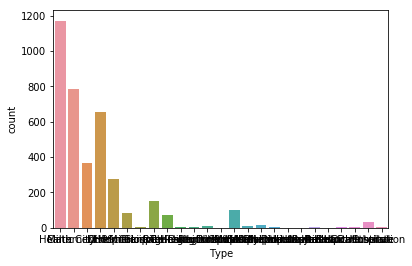

In [55]:
sns.countplot(facilities_types)